In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
data= pd.read_csv("boston_house_prices.csv", skiprows=[0])
array = data.values
X = array[:, :13]
y = array[:, 13]

In [2]:
X.shape
np.sum([y==50.0])


16

In [3]:
X = X[y<50.0]
y = y[y<50.0]

In [4]:
X.shape

(490, 13)

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
len(X)

490

In [7]:
len(y)

490

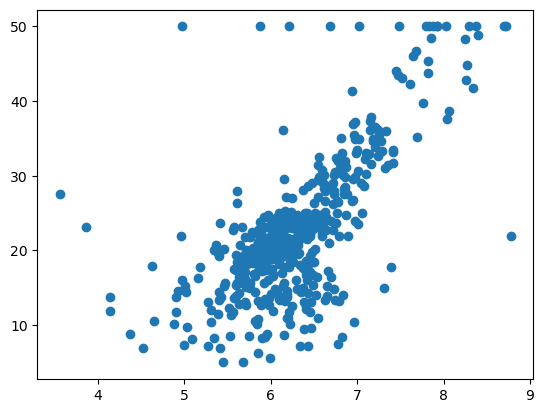

In [8]:
plt.scatter(array[:, 5], array[:, 13])

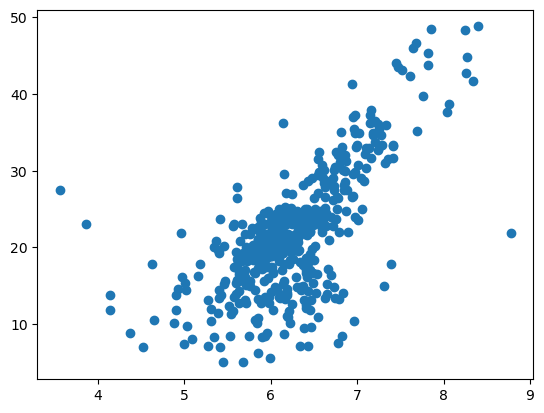

In [9]:
plt.scatter(X[:, 5], y)

In [10]:
import sys
sys.path.append(r'C:\\N-20KEPC0Y7KFA-Data\\junhuawa\\Documents\\00-Play-with-ML-in-Python\\Jupyter')
import playML
from playML.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [12]:
from playML.LinearRegression import LinearRegression

In [13]:
lin_reg1 = LinearRegression()
%timeit lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

63.9 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


0.8129794056212895

# 使用梯度下降法

In [14]:
lin_reg2 = LinearRegression()
%timeit lin_reg2.fit_gd(X_train, y_train)# 数据没有归一化，步长太大，算法不收敛
lin_reg2.score(X_test, y_test)

C:\Users\junhuawa\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\\N-20KEPC0Y7KFA-Data\\junhuawa\\Documents\\00-Play-with-ML-in-Python\\Jupyter\playML\LinearRegression.py:63: RuntimeWarning: overflow encountered in square
  return np.sum((X_b.dot(theta) - y) ** 2) / len(X_b)
C:\\N-20KEPC0Y7KFA-Data\\junhuawa\\Documents\\00-Play-with-ML-in-Python\\Jupyter\playML\LinearRegression.py:75: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:


457 ms ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


nan

In [15]:
%timeit lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

497 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
lin_reg2._theta

array([ 0.01195161, -0.10245704,  0.11535876, -0.06248791,  0.00207516,
        0.00447152,  0.11954208,  0.04684195,  0.03460927, -0.00452122,
        0.00324507,  0.1271939 ,  0.04484862, -0.22542441])

In [17]:
lin_reg2.score(X_test, y_test)#因为eta小，需要更多的循环才能找到最小值

0.2758681872447726

In [19]:
%timeit lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6) #非常耗时

1min 4s ± 2.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
lin_reg2.score(X_test, y_test)

0.7542932581943915

# 使用梯度下降法前进行数据归一化

In [26]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler()

In [27]:
X_train_standard = standardScaler.transform(X_train)

In [28]:
lin_reg3 = LinearRegression()

In [29]:
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: total: 609 ms
Wall time: 226 ms


LinearRegression()

In [30]:
X_test_standard = standardScaler.transform(X_test)

In [31]:
lin_reg3.score(X_test_standard, y_test)# R^2

0.8129873310487505

# 正规化和梯度下降法性能比较

In [32]:
m = 1000
n = 5000
big_X = np.random.normal(size=(m, n))
true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0]+np.random.normal(0.0, 10., size=m)

In [33]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

CPU times: total: 14.8 s
Wall time: 5.1 s


LinearRegression()

In [35]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

CPU times: total: 11 s
Wall time: 3.49 s


LinearRegression()